In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')   # 펭귄 dataset load

df.dropna(inplace=True) #df의 결측치들은 행째로 제거 (inplace=True를 통해 즉시 데이터에 적용)

# 수치 데이터만 저장한 데이터셋 생성
dataset = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

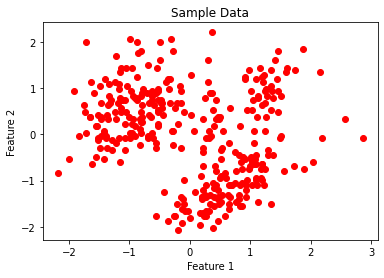

In [10]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c='red', marker='o')
plt.title('Sample Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

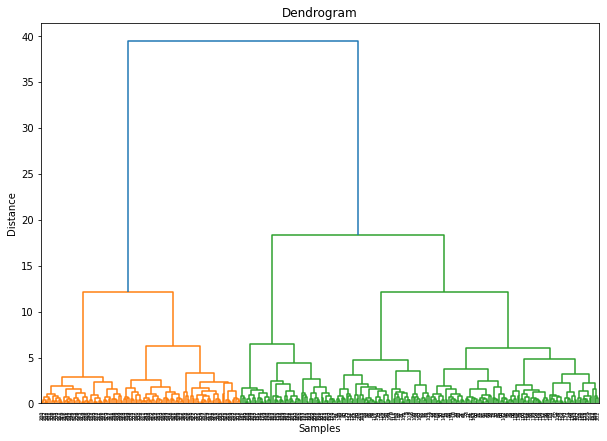

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 계층적 군집화 수행
Z = linkage(scaled_data, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

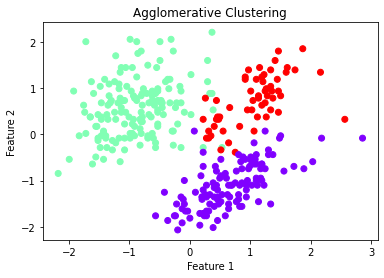

In [14]:
from sklearn.cluster import AgglomerativeClustering

# 계층적 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# 모델 피팅 및 클러스터 예측
labels = model.fit_predict(scaled_data)

# 클러스터 결과 시각화
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd

# 아이리스 데이터셋 로드
iris = load_iris()

In [17]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

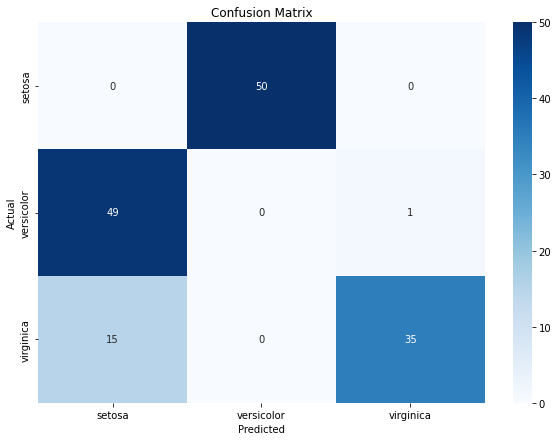

Accuracy: 23.33%


In [15]:
X = iris.data
y = iris.target

# 계층적 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# 모델 피팅 및 클러스터 예측
labels = model.fit_predict(X)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y, labels)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 정확도 계산
accuracy = accuracy_score(y, labels)
print(f"Accuracy: {accuracy * 100:.2f}%")